In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# prices of houses in an area as per the square feet
x = np.array([2, 3, 4, 7])
y = np.array([10, 30, 60, 90])


In [4]:
m = x.shape[0]
y_hat = np.array([])
w = 12.6
b = -0.3
for i in range(m):
    f_wb = w * x[i] + b
    y_hat = np.append(y_hat, f_wb)

In [5]:
def compute_cost ( x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        csum = (f_wb - y[i]) ** 2
        cost += csum
    total_cost = (1 / (2 * m )) * cost
    return total_cost

In [6]:
def compute_gradient ( x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dw = (f_wb -y[i]) * x[i]
        db = (f_wb -y[i])
        dj_dw += dw
        dj_db += db
    dj_dw =  dj_dw / m
    dj_db = dj_db / m

    return dj_dw , dj_db
    

In [7]:
def gradient_descent (x, y, w_in, b_in, alpha, iters, compute_cost, compute_gradient):

    w = w_in
    b = b_in
    cost_hist = []
    for i in range(iters):
        dj_dw, dj_db = compute_gradient( x, y, w, b)
    
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i % 100 == 0:
            cost = compute_cost( x, y, w, b)
            cost_hist.append(cost)
            
    return w, b, cost_hist
    

In [8]:
w_in = 0
b_in = 0
num_iters = 1000
alpha = 0.001
cost_history = []

final_w, final_b, cost_history = gradient_descent (x, y, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient)

print(final_w, final_b)
print(cost_history)

12.60535485075078 -0.3349272008428315
[np.float64(1525.8516718749997), np.float64(79.02504390170219), np.float64(54.30655656213361), np.float64(53.01225853668736), np.float64(52.133328956728434), np.float64(51.290265039500945), np.float64(50.47584128859965), np.float64(49.688989284951866), np.float64(48.928774035693245), np.float64(48.194293799441304)]


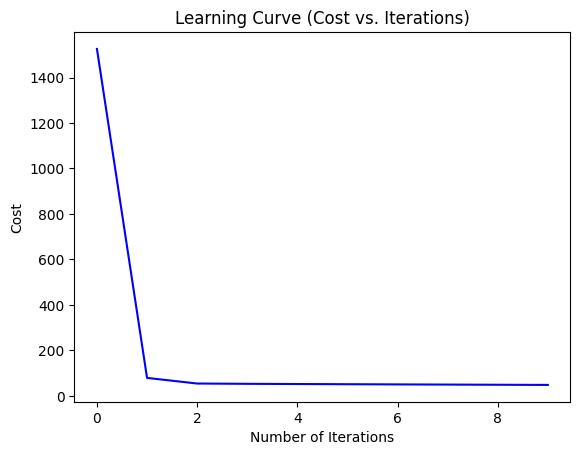

In [9]:
plt.plot(cost_history, color='blue')  
plt.title('Learning Curve (Cost vs. Iterations)')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

In [10]:
final_cost = compute_cost( x, y,final_w, final_b)

print(f"Final cost using optimized w and b: {final_cost}")
print(final_w, final_b)

Final cost using optimized w and b: 47.49165326298098
12.60535485075078 -0.3349272008428315


In [11]:

y_hat = []

for i in range(m):
    f_wb = x[i] * final_w + final_b
    y_hat.append(f_wb)

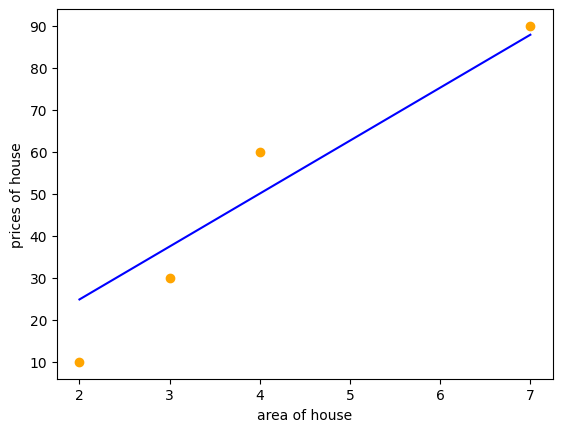

In [12]:
plt.plot( x, y_hat, color = 'blue')
plt.scatter (x, y , color = 'orange')
plt.xlabel ('area of house')
plt.ylabel ('prices of house')
plt.show()